In [1]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, roc_auc_score, auc, accuracy_score
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns
import catboost as cb

In [2]:
data1 = pd.read_csv('taiwan_data.csv')

In [3]:
data1.drop(columns="LIMIT_BAL",inplace=True)

In [4]:
data1.head()

,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,2,2,1,24,2,2,-1,-1,-2,-2,...,0,0,0,0,689,0,0,0,0,1
1,2,2,2,26,-1,2,0,0,0,2,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,2,2,2,34,0,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,2,2,1,37,0,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,1,2,1,57,-1,0,-1,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
print(data1.groupby('default payment next month').size())

default payment next month
0    23364
1     6636
dtype: int64


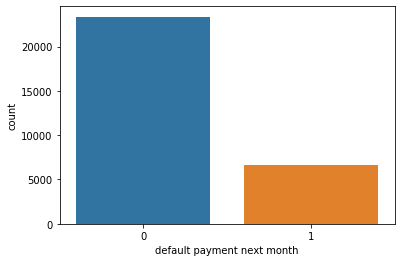

In [6]:
sns.countplot(data1['default payment next month'],label="Count")
plt.show()

#### On remarque un desequilbre entre les classes(Yes(1), No(0))

In [7]:
23364/(23364+6636)

0.7788

#### Diviser les données en données d'apprentissage et données de test 

In [8]:
y = data1.iloc[:,-1]   # Enregistrer la varialbe target
x = data1.iloc[:,0:-1]; # Enleveer la colonne target

In [46]:
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state = 1)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Classification Algorithms

In [47]:
Models_results=pd.DataFrame()

###  K-Nearest Neighbors

Text(0, 0.5, 'Erreur')

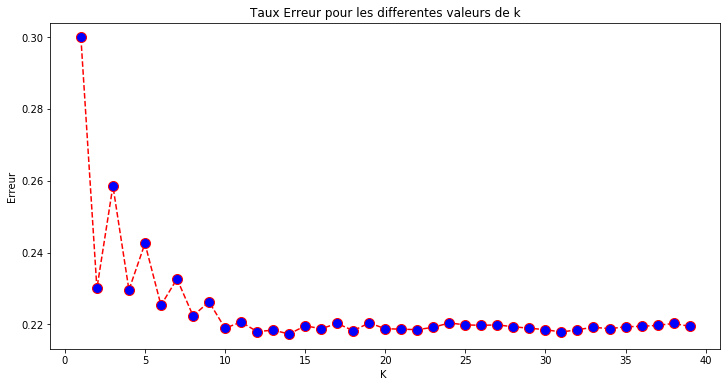

In [48]:
error = []
# Calculer l'erreur pour k entre 1 et 40 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

In [13]:
#Best k is 28 for minmaxScaler
#Best k is 16 for standardScaler
#Best k is 14 without Scaler

In [14]:
def K_Nearest_Neighbors(Models_results,k):
    knn = KNeighborsClassifier(k)
    knn_model=knn.fit(X_train, y_train)
    y_pred_knn =knn_model.predict(X_test)
    print(knn_model,'\n')
    print(confusion_matrix(y_test, y_pred_knn))
    print(classification_report(y_test,y_pred_knn))
    roc=roc_auc_score(y_test, y_pred_knn)
    acc = accuracy_score(y_test,y_pred_knn)
    prec = precision_score(y_test, y_pred_knn)
    rec = recall_score(y_test,y_pred_knn)
    f1 = f1_score(y_test, y_pred_knn)
    model =  pd.DataFrame([['K Nearest Neighbors', acc,prec,rec, f1,roc]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    M = Models_results.append(model, ignore_index = True)
    print('Accuracy of KNN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
    print('Accuracy of KNN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))
    return M

In [49]:
Models_results=K_Nearest_Neighbors(Models_results,14)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='uniform') 

[[5746   86]
 [1544  124]]
              precision    recall  f1-score   support

           0       0.79      0.99      0.88      5832
           1       0.59      0.07      0.13      1668

    accuracy                           0.78      7500
   macro avg       0.69      0.53      0.50      7500
weighted avg       0.74      0.78      0.71      7500

Accuracy of KNN classifier on training set: 0.79
Accuracy of KNN classifier on test set: 0.78


### CART

In [51]:
def Cart(Models_results):
    dtc = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)
    dtc_model=dtc.fit(X_train, y_train)
    y_pred_dtc = dtc_model.predict(X_test)
    print(dtc_model,'\n')
    print(confusion_matrix(y_test, y_pred_dtc))
    print(classification_report(y_test,y_pred_dtc))
    roc=roc_auc_score(y_test, y_pred_dtc)
    acc = accuracy_score(y_test,y_pred_dtc)
    prec = precision_score(y_test, y_pred_dtc)
    rec = recall_score(y_test,y_pred_dtc)
    f1 = f1_score(y_test, y_pred_dtc)
    model =  pd.DataFrame([['Classification and Regression Trees', acc,prec,rec, f1,roc]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    M = Models_results.append(model, ignore_index = True)
    print('Accuracy of CART classifier on training set: {:.2f}'.format(dtc.score(X_train, y_train)))
    print('Accuracy of CART classifier on test set: {:.2f}'.format(dtc.score(X_test, y_test)))
    return M

In [52]:
Models_results=Cart(Models_results)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best') 

[[4815 1017]
 [1034  634]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.82      5832
           1       0.38      0.38      0.38      1668

    accuracy                           0.73      7500
   macro avg       0.60      0.60      0.60      7500
weighted avg       0.73      0.73      0.73      7500

Accuracy of CART classifier on training set: 1.00
Accuracy of CART classifier on test set: 0.73


### Random Forest

In [53]:
def Random_Forest(Models_results):    
    rfc = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state=0)
    rfc_model = rfc.fit(X_train, y_train)
    y_pred_rfc = rfc_model.predict(X_test)
    print(rfc_model,'\n')
    print(confusion_matrix(y_test, y_pred_rfc))
    print(classification_report(y_test,y_pred_rfc))
    roc=roc_auc_score(y_test,y_pred_rfc)
    acc = accuracy_score(y_test,y_pred_rfc)
    prec = precision_score(y_test, y_pred_rfc)
    rec = recall_score(y_test,y_pred_rfc)
    f1 = f1_score(y_test,y_pred_rfc)
    model =  pd.DataFrame([['Random Forest', acc,prec,rec, f1,roc]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    M = Models_results.append(model, ignore_index = True)
    print('Accuracy of Random Forest classifier on training set: {:.2f}'.format(rfc.score(X_train, y_train)))
    print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rfc.score(X_test, y_test)))
    return M

In [54]:
Models_results=Random_Forest(Models_results)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False) 

[[5506  326]
 [1074  594]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      5832
           1       0.65      0.36      0.46      1668

    accuracy                           0.81      7500
   macro avg       0.74      0.65      0.67      7500
weighted avg       0.79      0.81      0.79      7500

Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.81


### Stochastic Gradient descent

In [55]:
def Stochastic_Gradient_Descent(Models_results):    
    sgd = SGDClassifier()
    sgd_model=sgd.fit(X_train, y_train)
    y_pred_stochastic_gradient_descent = sgd_model.predict(X_test)
    print(sgd_model,'\n')
    print(confusion_matrix(y_test,y_pred_stochastic_gradient_descent))
    print(classification_report(y_test,y_pred_stochastic_gradient_descent))
    roc=roc_auc_score(y_test,y_pred_stochastic_gradient_descent)
    acc = accuracy_score(y_test,y_pred_stochastic_gradient_descent)
    prec = precision_score(y_test,y_pred_stochastic_gradient_descent)
    rec = recall_score(y_test,y_pred_stochastic_gradient_descent)
    f1 = f1_score(y_test,y_pred_stochastic_gradient_descent)
    model =  pd.DataFrame([['Stochastic Gradient Descent', acc,prec,rec, f1,roc]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    M = Models_results.append(model, ignore_index = True)
    print('Accuracy of Stochastic Gradient Descent classifier on training set: {:.2f}'.format(sgd.score(X_train, y_train)))
    print('Accuracy of Stochastic Gradient Descent classifier on test set: {:.2f}'.format(sgd.score(X_test, y_test)))
    return M

In [56]:
Models_results=Stochastic_Gradient_Descent(Models_results)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False) 

[[ 935 4897]
 [ 155 1513]]
              precision    recall  f1-score   support

           0       0.86      0.16      0.27      5832
           1       0.24      0.91      0.37      1668

    accuracy                           0.33      7500
   macro avg       0.55      0.53      0.32      7500
weighted avg       0.72      0.33      0.29      7500

Accuracy of Stochastic Gradient Descent classifier on training set: 0.33
Accuracy of Stochastic Gradient Descent classifier on test set: 0.33


### SVM

In [57]:
def Support_Vector_Machine(Models_results):    
    scv = SVC()
    svc_model=scv.fit(X_train, y_train)
    y_pred_svm = svc_model.predict(X_test)
    print(svc_model,'\n')
    print(confusion_matrix(y_test,y_pred_svm))
    print(classification_report(y_test,y_pred_svm))
    roc=roc_auc_score(y_test,y_pred_svm)
    acc = accuracy_score(y_test,y_pred_svm)
    prec = precision_score(y_test,y_pred_svm)
    rec = recall_score(y_test,y_pred_svm)
    f1 = f1_score(y_test,y_pred_svm)
    model =  pd.DataFrame([['Support Vector Machine', acc,prec,rec, f1,roc]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    M = Models_results.append(model, ignore_index = True)
    print('Accuracy of Support Vector Machine classifier on training set: {:.2f}'.format(scv.score(X_train, y_train)))
    print('Accuracy of Support Vector Machine classifier on test set: {:.2f}'.format(scv.score(X_test, y_test)))
    return M

In [58]:
Models_results=Support_Vector_Machine(Models_results)

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False) 

[[5826    6]
 [1640   28]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      5832
           1       0.82      0.02      0.03      1668

    accuracy                           0.78      7500
   macro avg       0.80      0.51      0.45      7500
weighted avg       0.79      0.78      0.69      7500

Accuracy of Support Vector Machine classifier on training set: 0.99
Accuracy of Support Vector Machine classifier on test set: 0.78


#### Catboost

In [61]:
def Catboost(Models_results):    
    catt = cb.CatBoostClassifier(eval_metric='Accuracy',use_best_model=True,random_seed=0)
    catt_model=catt.fit(X_train, y_train,eval_set=(X_test,y_test))
    y_pred_catt = catt_model.predict(X_test)
    print(catt_model,'\n')
    print(confusion_matrix(y_test,y_pred_catt))
    print(classification_report(y_test,y_pred_catt))
    roc=roc_auc_score(y_test,y_pred_catt)
    acc = accuracy_score(y_test,y_pred_catt)
    prec = precision_score(y_test,y_pred_catt)
    rec = recall_score(y_test,y_pred_catt)
    f1 = f1_score(y_test,y_pred_catt)
    model =  pd.DataFrame([['Catboost', acc,prec,rec, f1,roc]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    M = Models_results.append(model, ignore_index = True)
    print('Accuracy of Catboost classifier on training set: {:.2f}'.format(catt.score(X_train, y_train)))
    print('Accuracy of Catboost classifier on test set: {:.2f}'.format(catt.score(X_test, y_test)))
    return M

In [62]:
Models_results=Catboost(Models_results)

Learning rate set to 0.108201
0:	learn: 0.8209778	test: 0.8198667	best: 0.8198667 (0)	total: 67.9ms	remaining: 1m 7s
1:	learn: 0.8213778	test: 0.8181333	best: 0.8198667 (0)	total: 128ms	remaining: 1m 3s
2:	learn: 0.8216000	test: 0.8184000	best: 0.8198667 (0)	total: 185ms	remaining: 1m 1s
3:	learn: 0.8211111	test: 0.8180000	best: 0.8198667 (0)	total: 251ms	remaining: 1m 2s
4:	learn: 0.8208889	test: 0.8181333	best: 0.8198667 (0)	total: 308ms	remaining: 1m 1s
5:	learn: 0.8217333	test: 0.8185333	best: 0.8198667 (0)	total: 367ms	remaining: 1m
6:	learn: 0.8214667	test: 0.8182667	best: 0.8198667 (0)	total: 430ms	remaining: 1m 1s
7:	learn: 0.8216444	test: 0.8181333	best: 0.8198667 (0)	total: 486ms	remaining: 1m
8:	learn: 0.8228444	test: 0.8184000	best: 0.8198667 (0)	total: 541ms	remaining: 59.5s
9:	learn: 0.8227111	test: 0.8182667	best: 0.8198667 (0)	total: 607ms	remaining: 1m
10:	learn: 0.8224444	test: 0.8185333	best: 0.8198667 (0)	total: 677ms	remaining: 1m
11:	learn: 0.8223111	test: 0.81866

94:	learn: 0.8272444	test: 0.8182667	best: 0.8202667 (33)	total: 5.8s	remaining: 55.3s
95:	learn: 0.8273333	test: 0.8182667	best: 0.8202667 (33)	total: 5.86s	remaining: 55.2s
96:	learn: 0.8274667	test: 0.8181333	best: 0.8202667 (33)	total: 5.92s	remaining: 55.1s
97:	learn: 0.8274667	test: 0.8181333	best: 0.8202667 (33)	total: 5.97s	remaining: 55s
98:	learn: 0.8276444	test: 0.8182667	best: 0.8202667 (33)	total: 6.04s	remaining: 55s
99:	learn: 0.8276444	test: 0.8184000	best: 0.8202667 (33)	total: 6.12s	remaining: 55s
100:	learn: 0.8276889	test: 0.8184000	best: 0.8202667 (33)	total: 6.17s	remaining: 54.9s
101:	learn: 0.8276889	test: 0.8184000	best: 0.8202667 (33)	total: 6.24s	remaining: 55s
102:	learn: 0.8276444	test: 0.8182667	best: 0.8202667 (33)	total: 6.32s	remaining: 55s
103:	learn: 0.8280000	test: 0.8182667	best: 0.8202667 (33)	total: 6.39s	remaining: 55s
104:	learn: 0.8279111	test: 0.8184000	best: 0.8202667 (33)	total: 6.45s	remaining: 54.9s
105:	learn: 0.8278222	test: 0.8182667	be

189:	learn: 0.8302222	test: 0.8186667	best: 0.8202667 (33)	total: 12.8s	remaining: 54.5s
190:	learn: 0.8304444	test: 0.8186667	best: 0.8202667 (33)	total: 12.8s	remaining: 54.4s
191:	learn: 0.8306667	test: 0.8185333	best: 0.8202667 (33)	total: 12.9s	remaining: 54.3s
192:	learn: 0.8305778	test: 0.8186667	best: 0.8202667 (33)	total: 13s	remaining: 54.2s
193:	learn: 0.8304889	test: 0.8185333	best: 0.8202667 (33)	total: 13s	remaining: 54.1s
194:	learn: 0.8307111	test: 0.8185333	best: 0.8202667 (33)	total: 13.1s	remaining: 54s
195:	learn: 0.8307556	test: 0.8185333	best: 0.8202667 (33)	total: 13.1s	remaining: 53.9s
196:	learn: 0.8308000	test: 0.8184000	best: 0.8202667 (33)	total: 13.2s	remaining: 53.9s
197:	learn: 0.8307556	test: 0.8184000	best: 0.8202667 (33)	total: 13.3s	remaining: 54s
198:	learn: 0.8306667	test: 0.8184000	best: 0.8202667 (33)	total: 13.4s	remaining: 53.9s
199:	learn: 0.8308889	test: 0.8184000	best: 0.8202667 (33)	total: 13.5s	remaining: 53.9s
200:	learn: 0.8309333	test: 0

285:	learn: 0.8343556	test: 0.8196000	best: 0.8202667 (33)	total: 18.2s	remaining: 45.5s
286:	learn: 0.8343556	test: 0.8196000	best: 0.8202667 (33)	total: 18.3s	remaining: 45.4s
287:	learn: 0.8344889	test: 0.8194667	best: 0.8202667 (33)	total: 18.3s	remaining: 45.3s
288:	learn: 0.8345333	test: 0.8193333	best: 0.8202667 (33)	total: 18.4s	remaining: 45.2s
289:	learn: 0.8345333	test: 0.8193333	best: 0.8202667 (33)	total: 18.4s	remaining: 45.1s
290:	learn: 0.8345333	test: 0.8193333	best: 0.8202667 (33)	total: 18.5s	remaining: 45s
291:	learn: 0.8344889	test: 0.8193333	best: 0.8202667 (33)	total: 18.5s	remaining: 44.9s
292:	learn: 0.8346222	test: 0.8194667	best: 0.8202667 (33)	total: 18.6s	remaining: 44.8s
293:	learn: 0.8345333	test: 0.8194667	best: 0.8202667 (33)	total: 18.6s	remaining: 44.8s
294:	learn: 0.8348444	test: 0.8194667	best: 0.8202667 (33)	total: 18.7s	remaining: 44.7s
295:	learn: 0.8349333	test: 0.8194667	best: 0.8202667 (33)	total: 18.8s	remaining: 44.6s
296:	learn: 0.8349333	t

379:	learn: 0.8364444	test: 0.8190667	best: 0.8202667 (33)	total: 23.4s	remaining: 38.2s
380:	learn: 0.8364444	test: 0.8190667	best: 0.8202667 (33)	total: 23.5s	remaining: 38.1s
381:	learn: 0.8364444	test: 0.8190667	best: 0.8202667 (33)	total: 23.5s	remaining: 38.1s
382:	learn: 0.8364000	test: 0.8190667	best: 0.8202667 (33)	total: 23.6s	remaining: 38s
383:	learn: 0.8364000	test: 0.8192000	best: 0.8202667 (33)	total: 23.6s	remaining: 37.9s
384:	learn: 0.8364000	test: 0.8190667	best: 0.8202667 (33)	total: 23.7s	remaining: 37.9s
385:	learn: 0.8364000	test: 0.8190667	best: 0.8202667 (33)	total: 23.7s	remaining: 37.7s
386:	learn: 0.8364000	test: 0.8190667	best: 0.8202667 (33)	total: 23.7s	remaining: 37.6s
387:	learn: 0.8364000	test: 0.8190667	best: 0.8202667 (33)	total: 23.8s	remaining: 37.5s
388:	learn: 0.8364444	test: 0.8192000	best: 0.8202667 (33)	total: 23.9s	remaining: 37.5s
389:	learn: 0.8364889	test: 0.8192000	best: 0.8202667 (33)	total: 23.9s	remaining: 37.4s
390:	learn: 0.8364000	t

473:	learn: 0.8375111	test: 0.8188000	best: 0.8202667 (33)	total: 28.8s	remaining: 31.9s
474:	learn: 0.8375556	test: 0.8189333	best: 0.8202667 (33)	total: 28.8s	remaining: 31.9s
475:	learn: 0.8374222	test: 0.8189333	best: 0.8202667 (33)	total: 28.9s	remaining: 31.8s
476:	learn: 0.8374667	test: 0.8190667	best: 0.8202667 (33)	total: 28.9s	remaining: 31.7s
477:	learn: 0.8374222	test: 0.8192000	best: 0.8202667 (33)	total: 29s	remaining: 31.7s
478:	learn: 0.8376000	test: 0.8192000	best: 0.8202667 (33)	total: 29.1s	remaining: 31.6s
479:	learn: 0.8375556	test: 0.8192000	best: 0.8202667 (33)	total: 29.1s	remaining: 31.5s
480:	learn: 0.8376444	test: 0.8190667	best: 0.8202667 (33)	total: 29.2s	remaining: 31.5s
481:	learn: 0.8376889	test: 0.8192000	best: 0.8202667 (33)	total: 29.2s	remaining: 31.4s
482:	learn: 0.8376889	test: 0.8192000	best: 0.8202667 (33)	total: 29.3s	remaining: 31.3s
483:	learn: 0.8376889	test: 0.8192000	best: 0.8202667 (33)	total: 29.3s	remaining: 31.3s
484:	learn: 0.8378222	t

567:	learn: 0.8384444	test: 0.8186667	best: 0.8202667 (33)	total: 34.1s	remaining: 25.9s
568:	learn: 0.8384000	test: 0.8186667	best: 0.8202667 (33)	total: 34.1s	remaining: 25.9s
569:	learn: 0.8384889	test: 0.8186667	best: 0.8202667 (33)	total: 34.2s	remaining: 25.8s
570:	learn: 0.8384889	test: 0.8186667	best: 0.8202667 (33)	total: 34.3s	remaining: 25.7s
571:	learn: 0.8383556	test: 0.8185333	best: 0.8202667 (33)	total: 34.3s	remaining: 25.7s
572:	learn: 0.8384444	test: 0.8184000	best: 0.8202667 (33)	total: 34.4s	remaining: 25.6s
573:	learn: 0.8384444	test: 0.8182667	best: 0.8202667 (33)	total: 34.4s	remaining: 25.6s
574:	learn: 0.8384889	test: 0.8182667	best: 0.8202667 (33)	total: 34.5s	remaining: 25.5s
575:	learn: 0.8384889	test: 0.8182667	best: 0.8202667 (33)	total: 34.6s	remaining: 25.4s
576:	learn: 0.8384444	test: 0.8184000	best: 0.8202667 (33)	total: 34.6s	remaining: 25.4s
577:	learn: 0.8385333	test: 0.8182667	best: 0.8202667 (33)	total: 34.7s	remaining: 25.3s
578:	learn: 0.8385333

661:	learn: 0.8400000	test: 0.8176000	best: 0.8202667 (33)	total: 39.6s	remaining: 20.2s
662:	learn: 0.8400444	test: 0.8176000	best: 0.8202667 (33)	total: 39.7s	remaining: 20.2s
663:	learn: 0.8400444	test: 0.8176000	best: 0.8202667 (33)	total: 39.7s	remaining: 20.1s
664:	learn: 0.8400000	test: 0.8177333	best: 0.8202667 (33)	total: 39.8s	remaining: 20s
665:	learn: 0.8400889	test: 0.8174667	best: 0.8202667 (33)	total: 39.8s	remaining: 20s
666:	learn: 0.8400889	test: 0.8174667	best: 0.8202667 (33)	total: 39.9s	remaining: 19.9s
667:	learn: 0.8400889	test: 0.8173333	best: 0.8202667 (33)	total: 40s	remaining: 19.9s
668:	learn: 0.8400444	test: 0.8174667	best: 0.8202667 (33)	total: 40.1s	remaining: 19.8s
669:	learn: 0.8400889	test: 0.8176000	best: 0.8202667 (33)	total: 40.1s	remaining: 19.8s
670:	learn: 0.8400444	test: 0.8176000	best: 0.8202667 (33)	total: 40.2s	remaining: 19.7s
671:	learn: 0.8400889	test: 0.8174667	best: 0.8202667 (33)	total: 40.2s	remaining: 19.6s
672:	learn: 0.8400444	test:

757:	learn: 0.8413778	test: 0.8177333	best: 0.8202667 (33)	total: 45.4s	remaining: 14.5s
758:	learn: 0.8413333	test: 0.8177333	best: 0.8202667 (33)	total: 45.5s	remaining: 14.4s
759:	learn: 0.8413333	test: 0.8177333	best: 0.8202667 (33)	total: 45.6s	remaining: 14.4s
760:	learn: 0.8413333	test: 0.8177333	best: 0.8202667 (33)	total: 45.6s	remaining: 14.3s
761:	learn: 0.8414222	test: 0.8176000	best: 0.8202667 (33)	total: 45.7s	remaining: 14.3s
762:	learn: 0.8414222	test: 0.8176000	best: 0.8202667 (33)	total: 45.7s	remaining: 14.2s
763:	learn: 0.8414222	test: 0.8174667	best: 0.8202667 (33)	total: 45.8s	remaining: 14.1s
764:	learn: 0.8413778	test: 0.8174667	best: 0.8202667 (33)	total: 45.9s	remaining: 14.1s
765:	learn: 0.8413778	test: 0.8174667	best: 0.8202667 (33)	total: 45.9s	remaining: 14s
766:	learn: 0.8413778	test: 0.8174667	best: 0.8202667 (33)	total: 45.9s	remaining: 14s
767:	learn: 0.8414222	test: 0.8174667	best: 0.8202667 (33)	total: 46s	remaining: 13.9s
768:	learn: 0.8414667	test:

850:	learn: 0.8423556	test: 0.8180000	best: 0.8202667 (33)	total: 50.5s	remaining: 8.85s
851:	learn: 0.8423556	test: 0.8180000	best: 0.8202667 (33)	total: 50.6s	remaining: 8.79s
852:	learn: 0.8423556	test: 0.8180000	best: 0.8202667 (33)	total: 50.6s	remaining: 8.72s
853:	learn: 0.8423556	test: 0.8178667	best: 0.8202667 (33)	total: 50.6s	remaining: 8.66s
854:	learn: 0.8424000	test: 0.8178667	best: 0.8202667 (33)	total: 50.7s	remaining: 8.6s
855:	learn: 0.8424889	test: 0.8178667	best: 0.8202667 (33)	total: 50.8s	remaining: 8.54s
856:	learn: 0.8424000	test: 0.8178667	best: 0.8202667 (33)	total: 50.8s	remaining: 8.48s
857:	learn: 0.8424889	test: 0.8178667	best: 0.8202667 (33)	total: 50.9s	remaining: 8.42s
858:	learn: 0.8424889	test: 0.8178667	best: 0.8202667 (33)	total: 50.9s	remaining: 8.36s
859:	learn: 0.8424889	test: 0.8176000	best: 0.8202667 (33)	total: 51s	remaining: 8.3s
860:	learn: 0.8424889	test: 0.8176000	best: 0.8202667 (33)	total: 51s	remaining: 8.24s
861:	learn: 0.8424889	test:

943:	learn: 0.8435556	test: 0.8174667	best: 0.8202667 (33)	total: 56.5s	remaining: 3.35s
944:	learn: 0.8435111	test: 0.8174667	best: 0.8202667 (33)	total: 56.7s	remaining: 3.3s
945:	learn: 0.8435111	test: 0.8174667	best: 0.8202667 (33)	total: 56.7s	remaining: 3.24s
946:	learn: 0.8435111	test: 0.8174667	best: 0.8202667 (33)	total: 56.8s	remaining: 3.18s
947:	learn: 0.8435111	test: 0.8174667	best: 0.8202667 (33)	total: 56.9s	remaining: 3.12s
948:	learn: 0.8435111	test: 0.8174667	best: 0.8202667 (33)	total: 56.9s	remaining: 3.06s
949:	learn: 0.8435111	test: 0.8174667	best: 0.8202667 (33)	total: 57.1s	remaining: 3s
950:	learn: 0.8435556	test: 0.8174667	best: 0.8202667 (33)	total: 57.1s	remaining: 2.94s
951:	learn: 0.8433333	test: 0.8173333	best: 0.8202667 (33)	total: 57.2s	remaining: 2.88s
952:	learn: 0.8434222	test: 0.8174667	best: 0.8202667 (33)	total: 57.3s	remaining: 2.82s
953:	learn: 0.8434222	test: 0.8174667	best: 0.8202667 (33)	total: 57.4s	remaining: 2.77s
954:	learn: 0.8434222	tes

#### Logistic Regression

In [63]:
def Logistic_Regression(Models_results):
    log = LogisticRegression()
    log_model= log.fit(X_train,y_train)
    print(log_model,'\n')
    y_pred_log_reg = log_model.predict(X_test)
    print(confusion_matrix(y_test, y_pred_log_reg))
    print(classification_report(y_test,y_pred_log_reg))
    roc=roc_auc_score(y_test, y_pred_log_reg)
    acc = accuracy_score(y_test,y_pred_log_reg)
    prec = precision_score(y_test, y_pred_log_reg)
    rec = recall_score(y_test, y_pred_log_reg)
    f1 = f1_score(y_test, y_pred_log_reg)
    model =  pd.DataFrame([['Logistic_Regression', acc,prec,rec, f1,roc]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    M = Models_results.append(model, ignore_index = True)
    print('Accuracy of Catboost classifier on training set: {:.2f}'.format(log.score(X_train, y_train)))
    print('Accuracy of Catboost classifier on test set: {:.2f}'.format(log.score(X_test, y_test)))
    return M

In [64]:
Models_results=Logistic_Regression(Models_results)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) 

[[5832    0]
 [1668    0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      5832
           1       0.00      0.00      0.00      1668

    accuracy                           0.78      7500
   macro avg       0.39      0.50      0.44      7500
weighted avg       0.60      0.78      0.68      7500

Accuracy of Catboost classifier on training set: 0.78
Accuracy of Catboost classifier on test set: 0.78


D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


## Best algorithms

### With MinMaxScaler

In [28]:
Models_results.sort_values(by=["Accuracy"],ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score,ROC
5,Catboost,0.820267,0.701511,0.333933,0.452478,0.646647
6,Logistic_Regression,0.816533,0.664786,0.353118,0.461237,0.651096
3,Stochastic Gradient Descent,0.813867,0.677083,0.311751,0.426929,0.634613
2,Random Forest,0.810667,0.675637,0.285971,0.401853,0.623353
0,K Nearest Neighbors,0.810267,0.649573,0.318945,0.427825,0.634867
4,Support Vector Machine,0.789200,0.784314,0.071942,0.131796,0.533142
1,Classification and Regression Trees,0.685867,0.325735,0.385492,0.353103,0.578634


### With StandardScaler

In [45]:
Models_results.sort_values(by=["Accuracy"],ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score,ROC
5,Catboost,0.820667,0.690224,0.351319,0.465634,0.653111
4,Support Vector Machine,0.818133,0.685366,0.336930,0.451768,0.646346
2,Random Forest,0.815600,0.673147,0.332134,0.444801,0.643005
3,Stochastic Gradient Descent,0.811467,0.625494,0.379496,0.472388,0.657255
0,K Nearest Neighbors,0.810800,0.660645,0.306954,0.419157,0.630929
6,Logistic_Regression,0.809067,0.709220,0.239808,0.358423,0.605844
1,Classification and Regression Trees,0.710667,0.371017,0.432854,0.399557,0.611489


## Without Scaler

In [65]:
Models_results.sort_values(by=["Accuracy"],ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score,ROC
5,Catboost,0.820267,0.686480,0.353118,0.466350,0.653496
6,Catboost,0.820267,0.686480,0.353118,0.466350,0.653496
2,Random Forest,0.813333,0.645652,0.356115,0.459042,0.650108
0,K Nearest Neighbors,0.782667,0.590476,0.074341,0.132055,0.529797
4,Support Vector Machine,0.780533,0.823529,0.016787,0.032902,0.507879
7,Logistic_Regression,0.777600,0.000000,0.000000,0.000000,0.500000
1,Classification and Regression Trees,0.726533,0.384010,0.380096,0.382043,0.602857
3,Stochastic Gradient Descent,0.326400,0.236037,0.907074,0.374598,0.533698
